#1.CNN(Convolutional Neural Networks)
* 합성곱 인공 신경망
* 전통적인 뉴럴 네트워크에 컨볼루셔널 레이어를 붙인형태
* 컨볼루셔널 레이어을 통해 입력 받은 이미지에 대한 특징(Feature)을 추출하게 되고, 추출한 특징에 기반으로 기존의 뉴럴 네트워크에 이용 한다.


###1-1.CNN을 사용하는 이유
* 이미지 분류할 때 DNN(Deep Neural Networks)의 문제점
  * 일반적인 DNN은 1차원 형태의 데이터를 사용 -> 2차원 이상의 데이터가 입력되는 경우 Flatten 시켜서 한줄로 데이터를 변환 후 넣어야한다.
  * 이미지의 공간적/지역적 정보가 손실됨

> DNN의 문제점을 해결하기 위해 이미지를 그대로 (Row Input)받음으로 공간적/지역적 정보를 유지

![](https://i.imgur.com/yn9B3Et.jpg)

###1-2.이미지 데이터
* 컬러 이미지는 3개의 채널로 이루어진 텐서
* 컴퓨터는 이미지를 숫자로 인식하여 연산을 한다.

<img src="https://i.imgur.com/mD4nKK1.png" width="300px">

<img src="https://i.imgur.com/bljeUqc.png" width="300px">

* 이미지의 정보는 0~255까지 256개의 숫자로 표현 할 수 있다.
* 빨강 255 , 파랑 255, 초록 255는 흰색
* 빨강 0, 파랑 0, 초록 0은 검정
* 빨강 255, 파랑 0, 초록 0은 빨강색


#2.Convolution연산
![](https://i.imgur.com/2MiTVss.png)
* 🔼컨볼루션 연산을 진행하면 출력 텐서의 크기가 작아질수 밖에 없음


![](https://i.imgur.com/fUuvC2r.gif)

* 패딩
  * 입력값 주위로 0을 넣어서 입력 값의 크기를 인위적으로 키워 결과값이 작아지는 것을 방지 하는것 !

* 출력크기를 동일하게 하기 위해 패딩을 사용 하기도 합니다.


![](https://i.imgur.com/AzbJCgg.gif)
* 컬러 이미지에는 2D컨볼루션 연산을 사용한다.


![](https://i.imgur.com/Ve8xWUh.gif)
* 스트라이드를 2x2로 하면 빠르게 스캔할 수 있다.(디테일은 떠러지지만 빠르게 찾을수 있다.)
* 풀링
  * 중요한 특징을 추출하고 차원을 축소하기 위해 폴링 연산을 사용한다.
    * MaxPool(MaxPool2D), AvgPool(AvgPool2D)

* 스트라이드(Stride)
  * 필터를 적용하는 간격의 설정을 스트라이드(Stride)라고 합니다.
  * 필터를 적용하여 얻어낸 결과를 Feature map 또는 Activation map이라고 부른다.

* 드롭아웃(Dropout) 레이어
  * 오버피팅을 막기 위해 사용하는 레이어
  * 학습중일 때 랜덤하게 값을 발생하여 학습을 방해함으로 학습용 데이터에 결과가  치우치는 것을 방지함.

* FC Layer(Fully Connected Layer)
  * 이미지를 분류 또는 설명하기 위해 예측하는 레이어

###2-1.CNN 체험
* CNN 체험하기
  * https://adamharley.com/nn_vis/

###2-2.CNN을 구성하는 레이어

* Conv2D: 특징 추출
* ReLU: 활성화 함수
* MaxPool2D: 차원축소
* Conv2D: 특징 추출
* ReLU: 활성화 함수
* MaxPool2D: 차원축소
* .... (횟수는 계속 넣어줄수 있음)

* Flatten : 다차원에서 1차원으로 변경해준다.
* Linear: 선형회귀
* ReLU: 활성화 함수
* ....
* Sigmoid(or Softmax): 출력

#3.간단한 CNN모델 만들기 실습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
#(1,1,28,28) (패치크기, 채널(1:그레이스케일, 3: 컬러), 높이, 너비)
inputs = torch.Tensor(1, 1, 28, 28)

print(inputs.shape)

torch.Size([1, 1, 28, 28])


In [ ]:
# 첫번째 Conv2D 만들기
# 1개를 넣어 32개의 아웃풋을 받는다.
# padding='same' : 크기를 유지하겠다.
conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same')
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
# 첫번째 MaxPool2D
# MaxPool2D: 차원축소
# kernel_size=2 : 스트라이더가 2x2이다.
pool = nn.MaxPool2d(kernel_size=2)
out=pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
# 두번째 Conv2D 만들기
#  padding='same' : 크기를 유지하겠다.
# in_channels : 두번째 돌리는거라서 1이 아니라 32를 넣어준다.
conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 'same')
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
# 두번째 MaxPool2D
# MaxPool2D: 차원축소
# kernel_size=2 : 스트라이더가 2x2이다.
pool = nn.MaxPool2d(kernel_size=2)
out=pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
# 한줄로 만들기 Flatten
# 배치를 제외한 3차원 데이터를 1차원으로 펼친다.
# 1차원으로 만들어야 nn.Linear() 레이어에 넣을 수 있다.
flatten = nn.Flatten()
out = flatten(out)
print(out.shape) # 64*7*7 = 3136

torch.Size([1, 3136])


In [ ]:
# Dense(Fully Connected)
# 선형회귀
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 10])


#4.CNN으로 MINIST분류하기


In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

In [ ]:
# GPU사용하기
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
from torchvision.transforms.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transforms.ToTensor(),
    download = True
 )

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transforms.ToTensor(),
    download = True
 )

In [ ]:
print(train_data)
print(test_data)

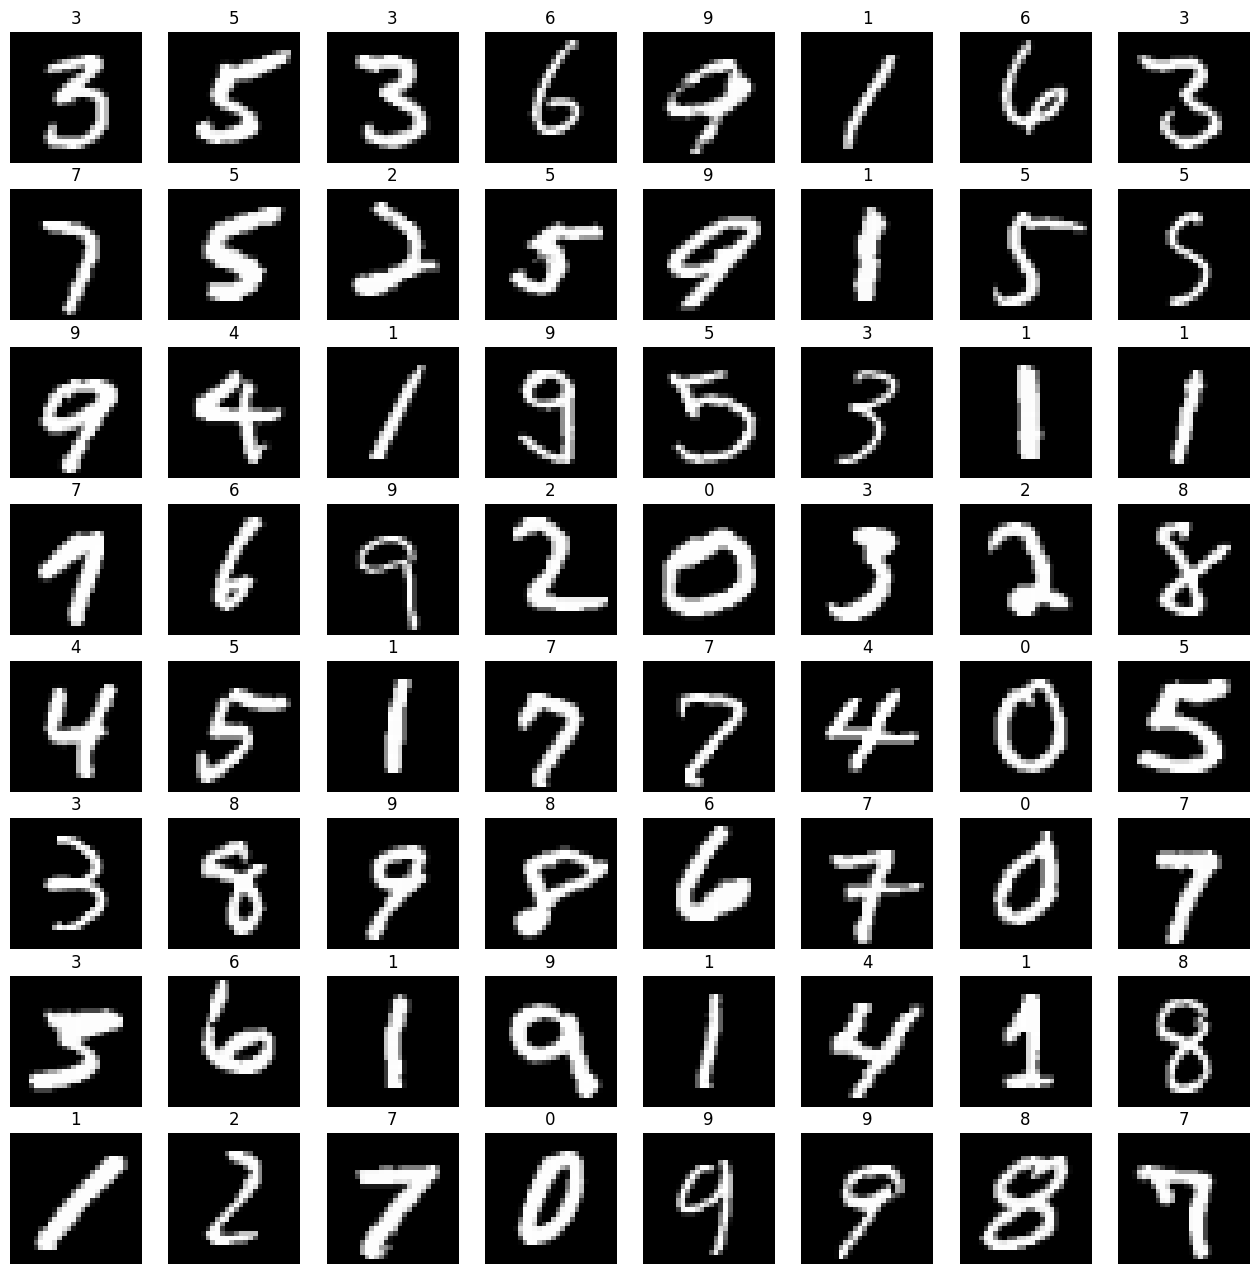

In [ ]:
# 손글씨 데이터 시각화로 보기
loader = DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=True
)

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

In [ ]:
# 모델 만들기

model = nn.Sequential(
    nn.Conv2d(1,32,kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(32,64,kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(7*7*64, 10)

).to(device)

print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [ ]:
from torch.nn.modules.loss import CrossEntropyLoss

# 학습
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
  sum_losses = 0
  sum_accs = 0

  for x_batch, y_batch in loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    y_pred = model(x_batch)

    loss = CrossEntropyLoss()(y_pred, y_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 배치 단위 loss저장
    sum_losses = sum_losses + loss.item()

    # 배치 단위 정확도 저장
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)
    acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
    sum_accs = sum_accs + acc.item()

  avg_loss = sum_losses / len(loader)
  avg_acc = sum_accs / len(loader)
  print(f'Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')


Epoch    1/10 Loss: 0.181773 Accuracy: 94.65%
Epoch    2/10 Loss: 0.055682 Accuracy: 98.35%
Epoch    3/10 Loss: 0.040624 Accuracy: 98.76%
Epoch    4/10 Loss: 0.032440 Accuracy: 99.00%
Epoch    5/10 Loss: 0.026126 Accuracy: 99.17%
Epoch    6/10 Loss: 0.021386 Accuracy: 99.34%
Epoch    7/10 Loss: 0.016954 Accuracy: 99.46%
Epoch    8/10 Loss: 0.013905 Accuracy: 99.58%
Epoch    9/10 Loss: 0.011918 Accuracy: 99.62%
Epoch   10/10 Loss: 0.009747 Accuracy: 99.69%


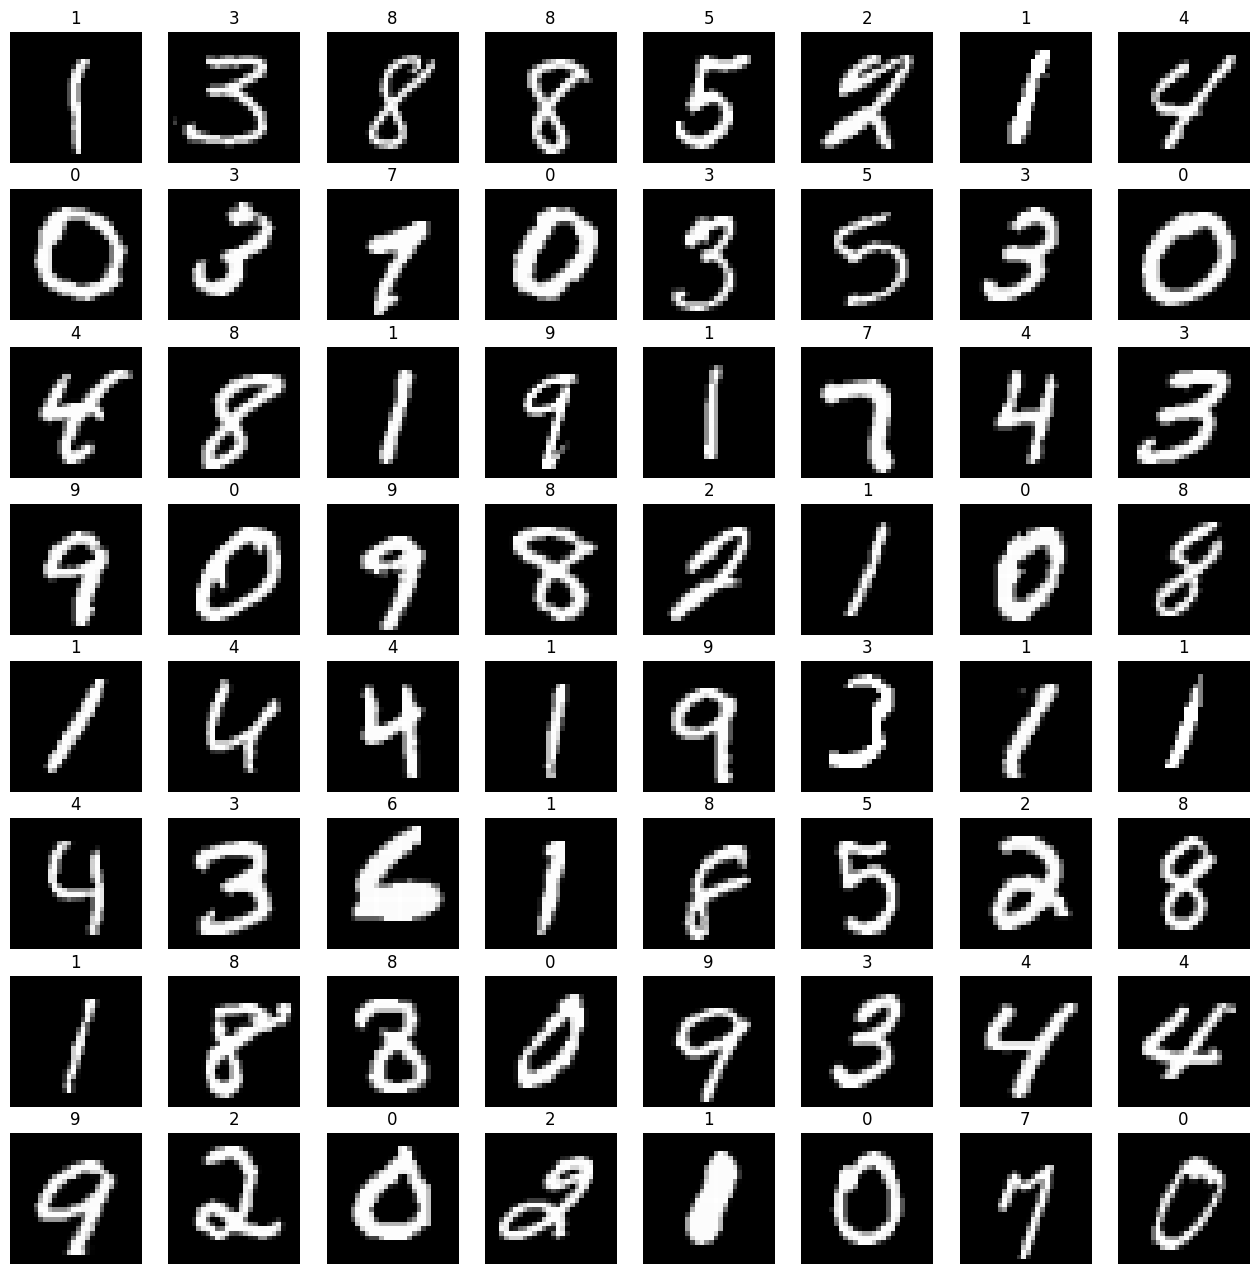

In [ ]:
# 진짜 테스트

test_loader = DataLoader(
    dataset=test_data,
    batch_size=64,
    shuffle=True
)

imgs, labels = next(iter(test_loader))

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

In [ ]:
model.eval()# 모델을 테스트 모드로 전환 (메모리를 절약해서 쓸수 있음)

sum_accs = 0

for x_batch, y_batch in test_loader:
  x_batch = x_batch.to(device)
  y_batch = y_batch.to(device)

  y_pred = model(x_batch)

  # 배치 단위 정확도 저장
  y_prob = nn.Softmax(1)(y_pred)
  y_pred_index = torch.argmax(y_prob, axis=1)
  acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

  sum_accs = sum_accs + acc.item()

avg_acc = sum_accs / len(test_loader)
print(f'테스트정확도는: {avg_acc:.2f}% 입니다.' )


테스트정확도는: 98.86% 입니다.
